Amit Ben-David

#HW 1
<font color='red'>**DEADLINE: 08.04.2024 23:59**</font>

# **Problem 1**

Below is the code for generating symmetric matrices with random entries in four different ways:

1. Entries are uniformly distributed in the interval [0, 1].  
2. Entries are uniformly distributed in the interval [-1, 1].  
3. A symmetric matrix is formed as the half-sum of a matrix (like in item 2) and its transpose.  
4. Entries are drawn from a normal distribution with mean **μ = 0** and standard deviation **σ = 1**.

Unfortunately, only **item 3** is implemented correctly. The following cell shows the result of running this code.
---

## **Problem 1a (1 point)**

Correct the implementations so that each method produces a symmetric matrix according to the intended description.

---

## **Problem 1b (1 point)**

Add a fifth method of generating a symmetric matrix with random entries. Choose any reasonable approach—ideally, the resulting entries should still lie roughly within the range
 $[-1, 1]$.

In [ ]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

%matplotlib inline
# Fix the seed and the random state
seed=42
random_state=42

In [ ]:
def generate_symmetric_matrix(size, algo="uniform"):
  """Generates a symmetric matrix with random entries according to algo

  Args:
    size: The size of the matrix (size x size).

  Returns:
    A NumPy array representing the symmetric matrix.
  """
  if algo == "uniform":
      #generate symmetric matrix with random entries uniform in [0,1]
      matrix_upper = np.triu(np.random.uniform(0, 1, size=(size, size)))
      matrix_strictly_lower = np.triu(np.random.uniform(0, 1, size=(size, size))).T
      for i in range(matrix_upper.shape[0]):
          matrix_strictly_lower[i][i] = 0
      return matrix_upper + matrix_strictly_lower
  if algo == "uniform_symm":
      #generate symmetric matrix with random entries uniform in [-1,1]
      matrix_upper = np.triu(np.random.uniform(-1, 1, size=(size, size)))
      matrix_strictly_lower = matrix_upper.T
      for i in range(matrix_upper.shape[0]):
          matrix_strictly_lower[i][i] = 0
      return matrix_upper + matrix_strictly_lower
  elif algo == "sum":
      matrix = np.random.uniform(-1, 1, size=(size, size))
      return (matrix + matrix.T) / 2
  if algo == "normal":
      #generate symmetric matrix with random entries normal with parameters (mu=0,sigma=1)
      matrix_upper = np.triu(np.random.normal(size=(size, size)))
      for i in range(matrix_upper.shape[0]):
        for j in range(i):
          matrix_upper[j][i] = matrix_upper[i][j]
      return matrix_upper

In [ ]:
# Example usage: Generate a 5x5 symmetric matrix
for algo in ["uniform", "uniform_symm", "sum", "normal"]:
    symmetric_matrix = generate_symmetric_matrix(5, algo=algo)
    print(algo)
    print(symmetric_matrix, "\n")

uniform
[[0.35953597 0.48131913 0.62362829 0.50994242 0.57062642]
 [0.85740367 0.60807716 0.21276707 0.1273292  0.97269672]
 [0.45581127 0.20735793 0.53140692 0.00390851 0.0882677 ]
 [0.30606542 0.0559138  0.60962018 0.62019646 0.84076385]
 [0.29494379 0.42934308 0.42885181 0.55003987 0.63142895]] 

uniform_symm
[[ 0.         -0.86350652 -0.72677791  0.80086377  0.29591522]
 [-0.86350652  0.         -0.82949503 -0.81473313 -0.12913579]
 [-0.72677791 -0.82949503  0.         -0.0498373  -0.20364373]
 [ 0.80086377 -0.81473313 -0.0498373   0.          0.61335548]
 [ 0.29591522 -0.12913579 -0.20364373  0.61335548  0.        ]] 

sum
[[ 0.65821141 -0.06350545 -0.00982105 -0.7285569  -0.32887069]
 [-0.06350545  0.49811971  0.10483278  0.30377236 -0.27555472]
 [-0.00982105  0.10483278  0.81045301 -0.46213902 -0.27699293]
 [-0.7285569   0.30377236 -0.46213902  0.26175897  0.67551275]
 [-0.32887069 -0.27555472 -0.27699293  0.67551275 -0.63962538]] 

normal
[[ 0.18939518  0.          0.          

Below is code that generates 1000 random matrices of size $10 \times 10$ using each of the four methods described above. For each matrix, the code computes:

- All eigenvalues,
- The maximum absolute value of the eigenvalues

And displays histograms of these quantities.

---

## **Problem 1c (1 point)**

Extend the output by adding a **5th row** of histograms corresponding to the matrix generation method you implemented in **Problem 1b**.

---

## **Problem 1d (1 point)**

Add a **3rd column** of histograms showing the **spread of eigenvalues**, defined as:
$
\text{Spread} = \lambda_{\max} - \lambda_{\min}
$
where $\lambda_{\max}$ and $\lambda_{\min}$ are the largest and smallest eigenvalues of the matrix, respectively.

100%|██████████| 1000/1000 [00:00<00:00, 1988.21it/s]


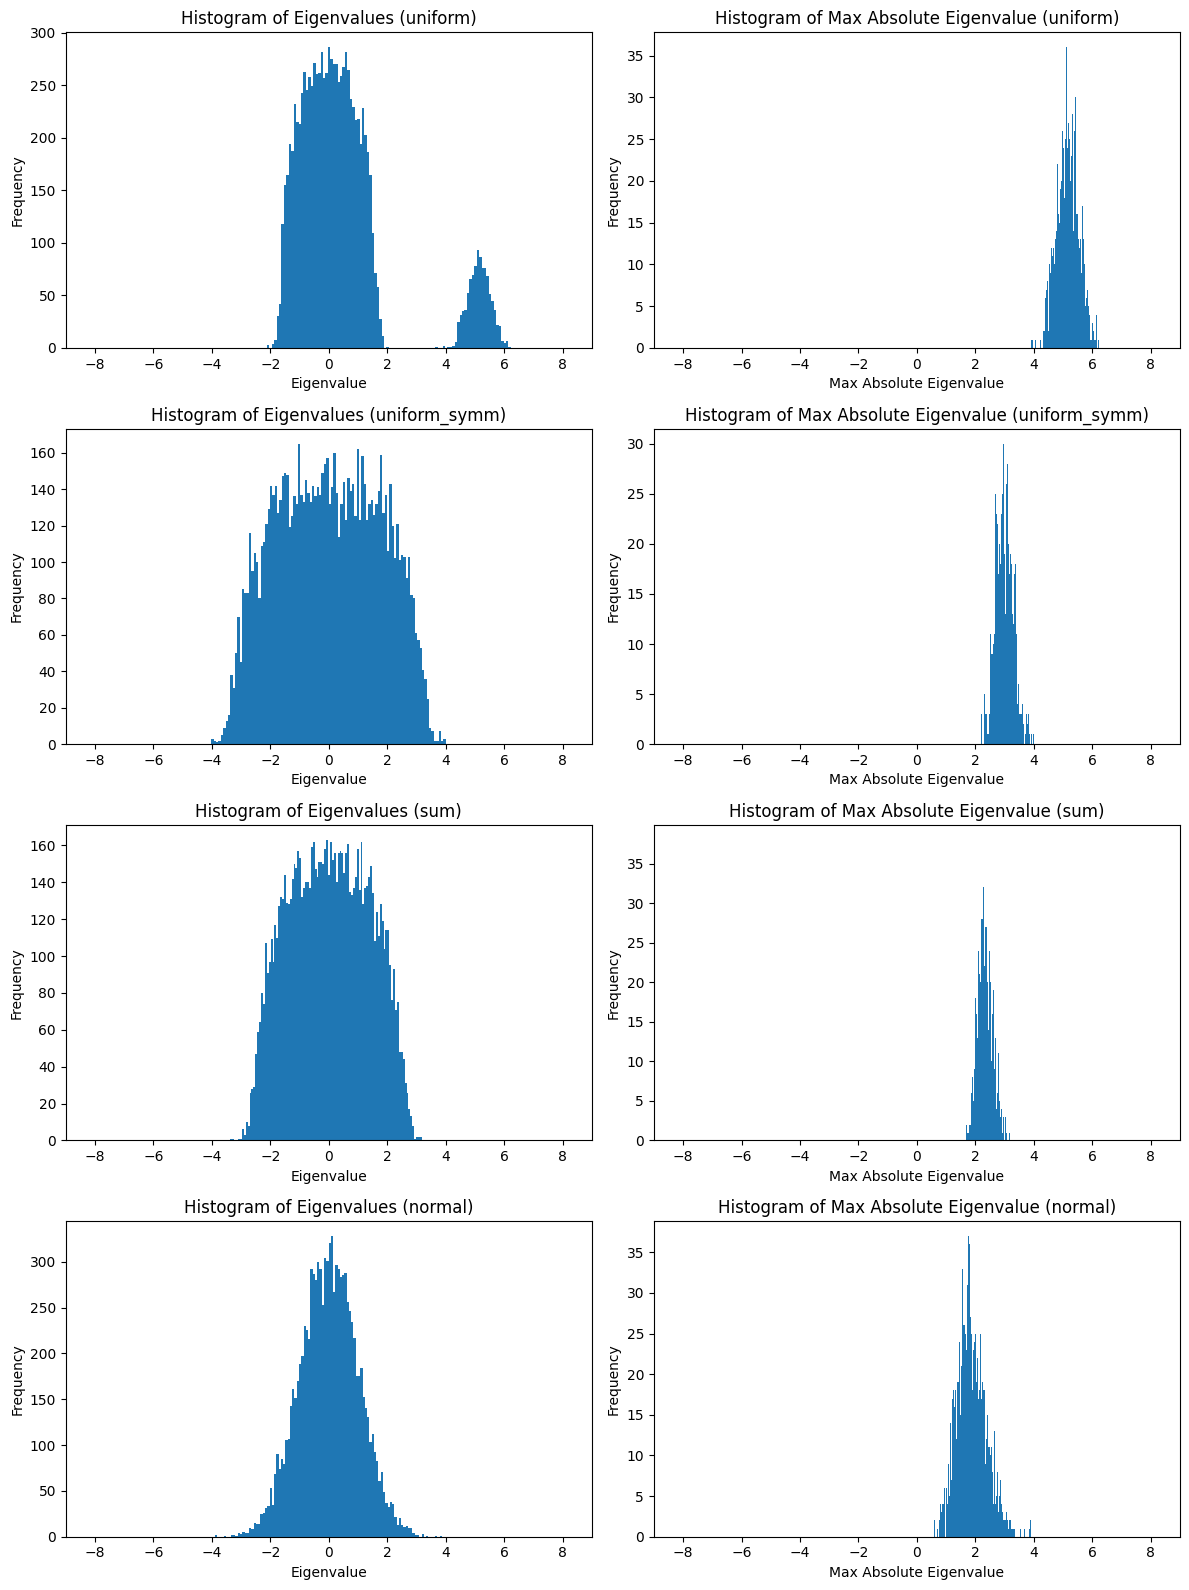

In [ ]:
# Assuming generate_symmetric_matrix function is defined as in the previous code

algos = ["uniform", "uniform_symm", "sum", "normal"]
fig, axes = plt.subplots(len(algos), 2, figsize=(12, 4 * len(algos)))

size=10

for i, algo in enumerate(algos):
    eigs = []
    max_eigs = []
    for _ in tqdm(range(1000)):
        symmetric_matrix = generate_symmetric_matrix(size, algo=algo)
        eigenvalues, _ = np.linalg.eigh(symmetric_matrix)
        eigs.extend(eigenvalues)
        max_eigs.append(np.max(np.abs(eigenvalues)))

    axes[i, 0].hist(eigs, bins=100)
    axes[i, 0].set_title(f"Histogram of Eigenvalues ({algo})")
    axes[i, 0].set_xlabel("Eigenvalue")
    axes[i, 0].set_ylabel("Frequency")

    axes[i, 1].hist(max_eigs, bins=100)
    axes[i, 1].set_title(f"Histogram of Max Absolute Eigenvalue ({algo})")
    axes[i, 1].set_xlabel("Max Absolute Eigenvalue")
    axes[i, 1].set_ylabel("Frequency")

    axes[i, 0].set_xlim([-9, 9])
    axes[i, 1].set_xlim([-9, 9])

plt.tight_layout()
plt.show()

---

## **Problem 1e (1 point)**

Look at the top-left histogram. You may notice a distinct gap or irregularity in the distribution.

**Question:** What causes this gap? Provide a brief explanation based on how the matrices were generated and how their eigenvalues behave.


---

## **Problem 1f (1 point)**

The code below generates matrices whose entries are uniformly drawn from [0, 1] using both a correct and an incorrect implementation. It then plots the same types of histograms as before.

**Instructions:**

1. Copy your corrected implementation from **Problem 1a** into the indicated section of the code below.  
2. Run the code to compare the results.  
3. You will likely observe that the histograms produced by both versions look almost identical.

**Question:** Why do the histograms appear so similar, even though one method is technically incorrect? Provide a brief explanation.




In [ ]:
def generate_uniform_symmetric_matrix(size, algo="incorrect"):
  """Generates a symmetric matrix with uniform random entries correctly or incorrectly

  Args:
    size: The size of the matrix (size x size).

  Returns:
    A NumPy array representing the symmetric matrix.
  """
  if algo == "incorrect":
      #generate symmetric matrix with random entries uniform in [0,1]
      matrix_upper = np.triu(np.random.uniform(0, 1, size=(size, size)))
      matrix_strictly_lower = np.triu(np.random.uniform(0, 1, size=(size, size))).T
      for i in range(matrix_upper.shape[0]):
          matrix_strictly_lower[i][i] = 0
      return matrix_upper + matrix_strictly_lower
  elif algo == "correct":
      # your code from 2a here

algos = ["incorrect", "correct"]
fig, axes = plt.subplots(len(algos), 2, figsize=(12, 4 * len(algos)))

size=10

for i, algo in enumerate(algos):
    eigs = []
    max_eigs = []
    for _ in tqdm(range(1000)):
        symmetric_matrix = generate_uniform_symmetric_matrix(size, algo=algo)
        eigenvalues, _ = np.linalg.eigh(symmetric_matrix)
        eigs.extend(eigenvalues)
        max_eigs.append(np.max(np.abs(eigenvalues)))

    axes[i, 0].hist(eigs, bins=100)
    axes[i, 0].set_title(f"Histogram of Eigenvalues ({algo})")
    axes[i, 0].set_xlabel("Eigenvalue")
    axes[i, 0].set_ylabel("Frequency")

    axes[i, 1].hist(max_eigs, bins=100)
    axes[i, 1].set_title(f"Histogram of Max Absolute Eigenvalue ({algo})")
    axes[i, 1].set_xlabel("Max Absolute Eigenvalue")
    axes[i, 1].set_ylabel("Frequency")

    axes[i, 0].set_xlim([-9, 9])
    axes[i, 1].set_xlim([-9, 9])

plt.tight_layout()
plt.show()

IndentationError: expected an indented block after 'elif' statement on line 17 (<ipython-input-5-b65ca4a84f45>, line 20)

# Problem 2

In class, we tried to train a model to solve quadratic equations but were not successful. Let’s correct that by using a small “cheat.”

The idea is to leverage the approximation:

$\sqrt{x}\approx 1+\frac{x-1}{2}$ if $x\approx 1$.

## **Problem 2a (2 points)**
Generate quadratic polynomials such that their discriminant is approximately 1. Fill in the missing parts of the code below, then run the subsequent cells.

In [ ]:
def generate_quadratic_data(n_samples, limit_coef=1.0):
    # Method 1: Sampling coefficients p, q
    p_values_1 = []
    q_values_1 = []
    roots_1 = []
    sigma = 0.1
    while len(p_values_1) < n_samples:
        # your code here

    data1 = pd.DataFrame({'p': p_values_1, 'q': q_values_1, 'y': roots_1})
    return data1

n_samples = 10000
limit_coef = 2.0
data1 = generate_quadratic_data(n_samples, limit_coef)
print(data1.shape)

In [ ]:
# Plot the datasets
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(data1['p'], data1['q'], s=5, label='Method 1')
plt.xlabel('p')
plt.ylabel('q')
plt.title('Quadrics (Method 1, p and q)')
plt.legend()
plt.xlim(auto=True)
plt.ylim(auto=True)
#plt.xlim(-limit_coef - 0.1, limit_coef + 0.1)
#plt.ylim(-limit_coef - 0.1, limit_coef + 0.1)


plt.tight_layout()
plt.show()

## **Problem 2b (2 points)**
Run the cell below and interpret the results:

Does the degree-2 polynomial we obtained resemble what one would get from

$
y = \frac{1}{2}(-p + \sqrt{p^2 - 4q})
$

by approximating the square root linearly near 1?

Provide a brief explanation of whether (and why) they match.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def get_best_polynomial_model(df, max_degree=2):
    max_num_terms = int((max_degree + 1) * (max_degree + 2) / 2)
    # Create a list to store data for the DataFrame
    data = []

    for degree in range(0,max_degree+1):
        poly_features = PolynomialFeatures(degree=degree, include_bias=True)
        X_poly = poly_features.fit_transform(df[['p','q']])
        model = LinearRegression()
        model.fit(X_poly, data1['y'])
        coefficients = model.coef_
        intercept = model.intercept_
        row = list(coefficients)
        row[0] = intercept
        while len(row) < max_num_terms:
            row.append(0)
        data.append(row)

    # Create a list of polynomial terms
    terms = []
    for i in range(degree + 1):
        for j in range(i + 1):
            if i == 0:
                terms.append("1")
            elif j == 0:
                terms.append(f"p^{i}")
            elif i == j:
                terms.append(f"q^{i}")
            else:
                terms.append(f"p^{i-j}q^{j}")

    # Create the Pandas DataFrame
    df = pd.DataFrame(data, columns=terms)
    display(df)

get_best_polynomial_model(data1, max_degree=2)